## Emotion Detection


**importing libraries**


In [6]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [15]:
import os

In [16]:
import matplotlib.pyplot as plt
from glob import glob 
import cv2
import random


%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf
print("tensorflow version: ",tf.__version__)

tensorflow version:  2.15.0


In [17]:
print("g")

g


In [18]:
images = glob("train/**/**")

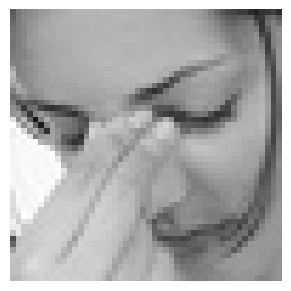

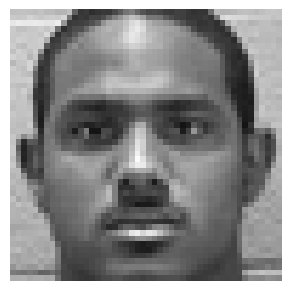

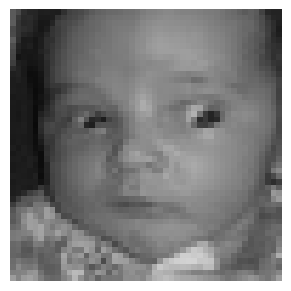

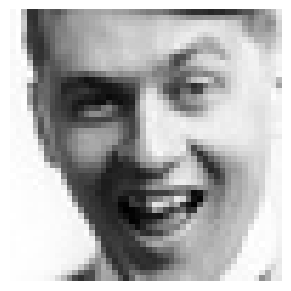

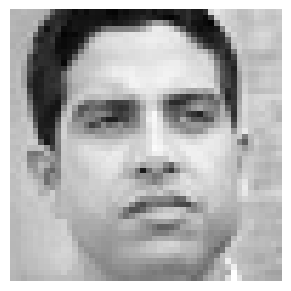

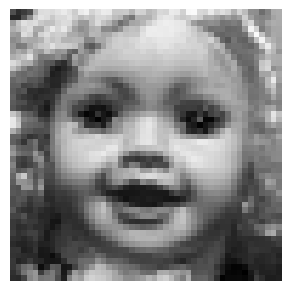

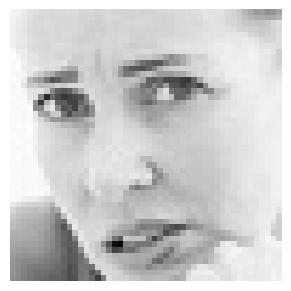

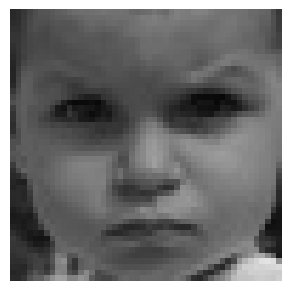

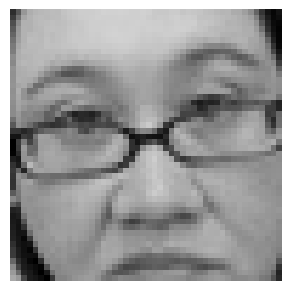

In [19]:
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331 + i)
    plt.imshow(cv2.imread(image))
    plt.axis('off')

**Preprocessing**


In [20]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/", target_size=(img_size,img_size), color_mode="grayscale", 
                                                    batch_size=batch_size, class_mode ="categorical", shuffle=True)

Found 28709 images belonging to 7 classes.


In [21]:
datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory("test/", target_size=(img_size,img_size), color_mode="grayscale", 
                                                    batch_size=batch_size, class_mode ="categorical", shuffle=True)

Found 7178 images belonging to 7 classes.


**Defining model**


In [22]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [23]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x
    


In [24]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32,(3,3))
    conv_2 = Convolution(inputs,64, (5,5))
    conv_3 = Convolution(inputs, 128, (3,3))
    
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7, activation='softmax')(dense_1)
    model = Model(inputs=[inputs], outputs = [output])
    model.compile(loss=['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [25]:
model = model_fer((48,48,1))

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0     

In [27]:
train_generator.batch_size

64

In [28]:
train_generator.n

28709

In [31]:
epochs = 8
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor = "val_accuracy", save_weights_only = True, mode = 'max', verbose = 1)
callback = [checkpoint]

**Training the modeel**


In [32]:
history = model.fit(x=train_generator, steps_per_epoch = steps_per_epoch, epochs=epochs, validation_data = validation_generator, validation_steps=validation_steps, callbacks = callback)

Epoch 1/8
448/448 [==============================] - ETA: 0s - loss: 1.0539 - accuracy: 0.6120
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 271s 605ms/step - loss: 1.0539 - accuracy: 0.6120 - val_loss: 1.6487 - val_accuracy: 0.3929
Epoch 2/8
448/448 [==============================] - ETA: 0s - loss: 0.9439 - accuracy: 0.6562
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 217s 485ms/step - loss: 0.9439 - accuracy: 0.6562 - val_loss: 1.7363 - val_accuracy: 0.3694
Epoch 3/8
448/448 [==============================] - ETA: 0s - loss: 0.8211 - accuracy: 0.7049
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 234s 521ms/step - loss: 0.8211 - accuracy: 0.7049 - val_loss: 1.5944 - val_accuracy: 0.4494
Epoch 4/8
448/448 [==============================] - ETA: 0s - loss: 0.7090 - accuracy: 0.7467
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 2908

In [33]:
model.evaluate(validation_generator)

113/113 [==============================] - 66s 584ms/step - loss: 1.6567 - accuracy: 0.4975


[1.6567140817642212, 0.49749234318733215]

**Plotting loss**


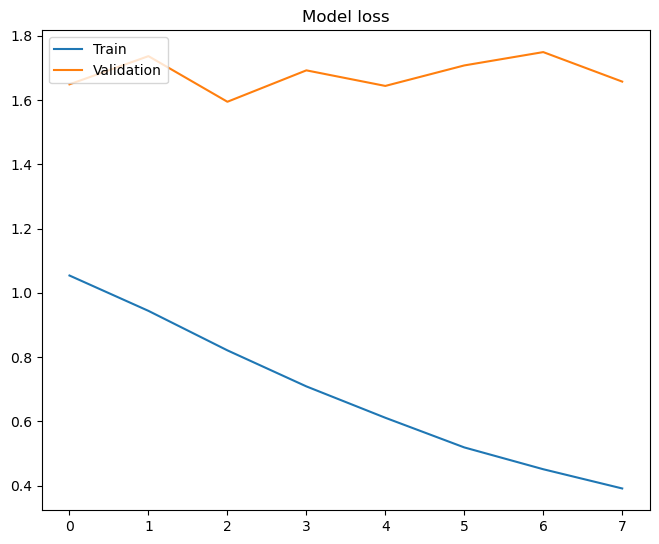

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['Train','Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0,right = 0.95, left=0.0, hspace=0.25,wspace=0.35)

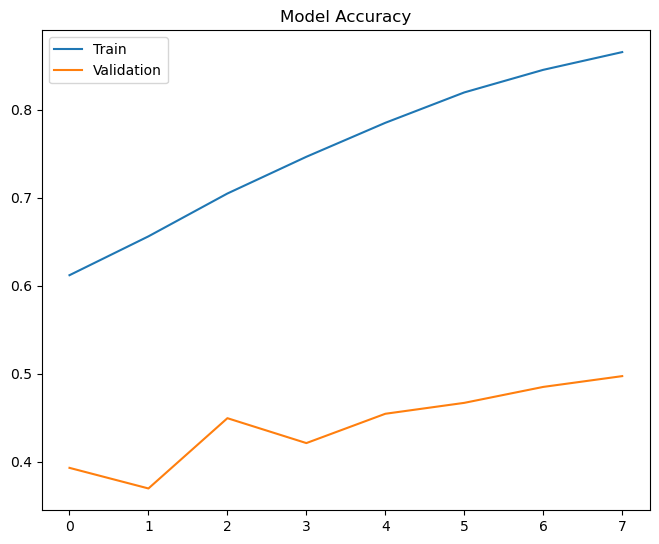

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0,right = 0.95, left=0.0, hspace=0.25,wspace=0.35)

In [35]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)
